In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel(r'CAERS.xlsx', sheet_name='PRODUCT-BASED', parse_dates=['REPORT_ID', 'DATE_EVENT'])

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\1245809362.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_excel(r'C:\Users\ank30\OneDrive\Projects\CAERS\CAERS.xlsx', sheet_name='PRODUCT-BASED', parse_dates=['REPORT_ID', 'DATE_EVENT'])


In [2]:
data.head()

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME
0,2024-07-31,2024-CFS-010273,2024-07-31,SUSPECT,SILK UNSWEETENED VANILLA ALMOND MILK,14,Filled Milk/Imit Milk Prod,NaN,NaN,Unknown,Nausea,Other Serious or Important Medical Event
1,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 1 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event
2,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 2 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event
3,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 3 2OZ,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event
4,2024-07-31,2024-CFS-010262,2024-07-15,SUSPECT,SLOWMAG MG MUSCLE PLUS HEART,54,Vit/Min/Prot/Unconv Diet(Human/Animal),81.0,year(s),Female,"Dizziness, Loss of consciousness, Vomiting","Other Serious or Important Medical Event, Othe..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221177 entries, 0 to 221176
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DATE_FDA_FIRST_RECEIVED_REPORT  221177 non-null  datetime64[ns]
 1   REPORT_ID                       221177 non-null  object        
 2   DATE_EVENT                      152657 non-null  datetime64[ns]
 3   PRODUCT_TYPE                    221177 non-null  object        
 4   PRODUCT                         221176 non-null  object        
 5   PRODUCT_CODE                    221177 non-null  object        
 6   DESCRIPTION                     221177 non-null  object        
 7   PATIENT_AGE                     148700 non-null  float64       
 8   AGE_UNITS                       148700 non-null  object        
 9   SEX                             210811 non-null  object        
 10  CASE_MEDDRA_PREFERRED_TERMS     221177 non-null  object 

In [4]:
data.shape

(221177, 12)

In [5]:
data.columns

Index(['DATE_FDA_FIRST_RECEIVED_REPORT', 'REPORT_ID', 'DATE_EVENT',
       'PRODUCT_TYPE', 'PRODUCT', 'PRODUCT_CODE', 'DESCRIPTION', 'PATIENT_AGE',
       'AGE_UNITS', 'SEX', 'CASE_MEDDRA_PREFERRED_TERMS', 'CASE_OUTCOME'],
      dtype='object')

In [6]:
data.rename(columns={'DATE_FDA_FIRST_RECEIVED_REPORT':'report_date', 'REPORT_ID': 'id', 'DATE_EVENT':'event_onset',
                     'PRODUCT_TYPE': 'product_type', 'PRODUCT': 'product', 'PRODUCT_CODE': 'product_code', 
                    'DESCRIPTION': 'description','PATIENT_AGE': 'age', 'AGE_UNITS': 'age_unit', 'SEX': 'sex',
                     'CASE_MEDDRA_PREFERRED_TERMS': 'event', 'CASE_OUTCOME': 'outcome'}, inplace= True)

In [7]:
data.columns

Index(['report_date', 'id', 'event_onset', 'product_type', 'product',
       'product_code', 'description', 'age', 'age_unit', 'sex', 'event',
       'outcome'],
      dtype='object')

In [8]:
data.isnull().sum()

report_date         0
id                  0
event_onset     68520
product_type        0
product             1
product_code        0
description         0
age             72477
age_unit        72477
sex             10366
event               0
outcome             0
dtype: int64

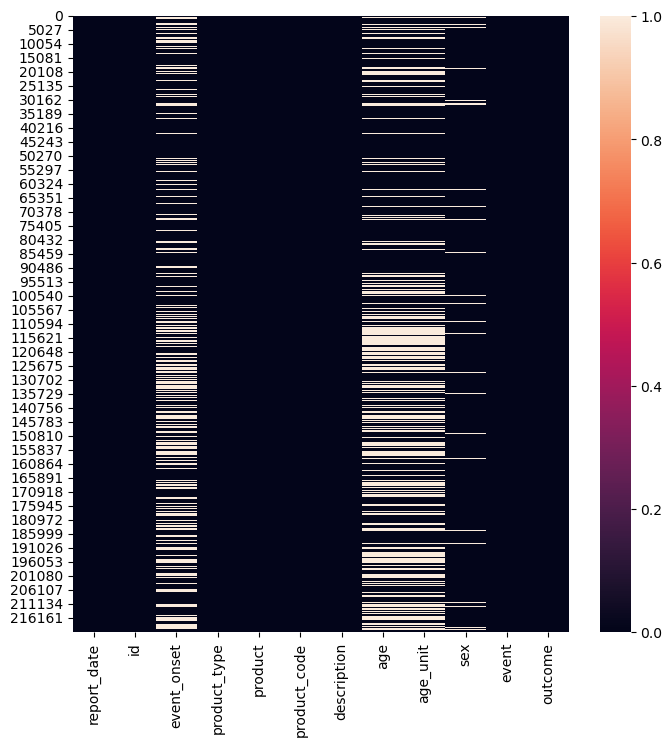

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())
plt.show()

In [10]:
data.duplicated().value_counts()

False    194199
True      26978
Name: count, dtype: int64

In [11]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,report_date,id,event_onset,product_type,product,product_code,description,age,age_unit,sex,event,outcome
907,2024-06-14,2024-CFS-005991,NaT,SUSPECT,VITAL PROTEINS COLLAGEN PEPTIDES UNFLAVORED,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Malignant melanoma, Thyroid disorder","Other Serious or Important Medical Event, Othe..."
908,2024-06-14,2024-CFS-005991,NaT,SUSPECT,VITAL PROTEINS COLLAGEN PEPTIDES UNFLAVORED,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"Malignant melanoma, Thyroid disorder","Other Serious or Important Medical Event, Othe..."
2936,2024-02-20,2024-CFS-002251,2021-12-26,SUSPECT,ORIGINAL ALIPOTEC TEJOCOTE ROOT TREATMENT 1 BO...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,year(s),Female,"Arrhythmia, Chest discomfort, Chest pain, Neur...","Life Threatening, Hospitalization, Disability"
2937,2024-02-20,2024-CFS-002251,2021-12-26,SUSPECT,ORIGINAL ALIPOTEC TEJOCOTE ROOT TREATMENT 1 BO...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,year(s),Female,"Arrhythmia, Chest discomfort, Chest pain, Neur...","Life Threatening, Hospitalization, Disability"
2939,2024-02-20,2024-CFS-002251,2021-12-26,SUSPECT,ORIGINAL ALIPOTEC TEJOCOTE ROOT TREATMENT 1 BO...,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,year(s),Female,"Arrhythmia, Chest discomfort, Chest pain, Neur...","Life Threatening, Hospitalization, Disability"
...,...,...,...,...,...,...,...,...,...,...,...,...
219971,2004-04-13,68138,NaT,SUSPECT,EXEMPTION 4,53,Cosmetics,32.0,year(s),Female,"BURNING SENSATION, HYPERSENSITIVITY, INFECTION...",Visited a Health Care Provider
219972,2004-04-13,68138,NaT,SUSPECT,EXEMPTION 4,53,Cosmetics,32.0,year(s),Female,"BURNING SENSATION, HYPERSENSITIVITY, INFECTION...",Visited a Health Care Provider
219973,2004-04-13,68138,NaT,SUSPECT,EXEMPTION 4,53,Cosmetics,32.0,year(s),Female,"BURNING SENSATION, HYPERSENSITIVITY, INFECTION...",Visited a Health Care Provider
220206,2004-03-12,70661,NaT,SUSPECT,EXEMPTION 4,53,Cosmetics,NaN,NaN,Female,"BLISTER, SWELLING",Visited a Health Care Provider


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().value_counts()

False    194199
Name: count, dtype: int64

In [14]:
data['product'].value_counts()[0:20].sort_values(ascending=False)

product
EXEMPTION 4                                                         39750
JOHNSONS POWDER NO UPC                                               3722
SHOWER TO SHOWER NO UPC                                              1349
SUPER BETA PROSTATE                                                  1108
VITAMIN D                                                            1025
MULTIVITAMIN                                                          816
PRESERVISION AREDS 2                                                  801
JIF CREAMY PEANUT BUTTER                                              796
FISH OIL                                                              783
CALCIUM                                                               744
VITAMIN C                                                             639
CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MULTIVITAMINS) TABLET      618
Vitamin D                                                             541
JIF PEANUT BUTTER             

C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\2367385097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data_product, y='product', order=top_40_products.index,palette="viridis")


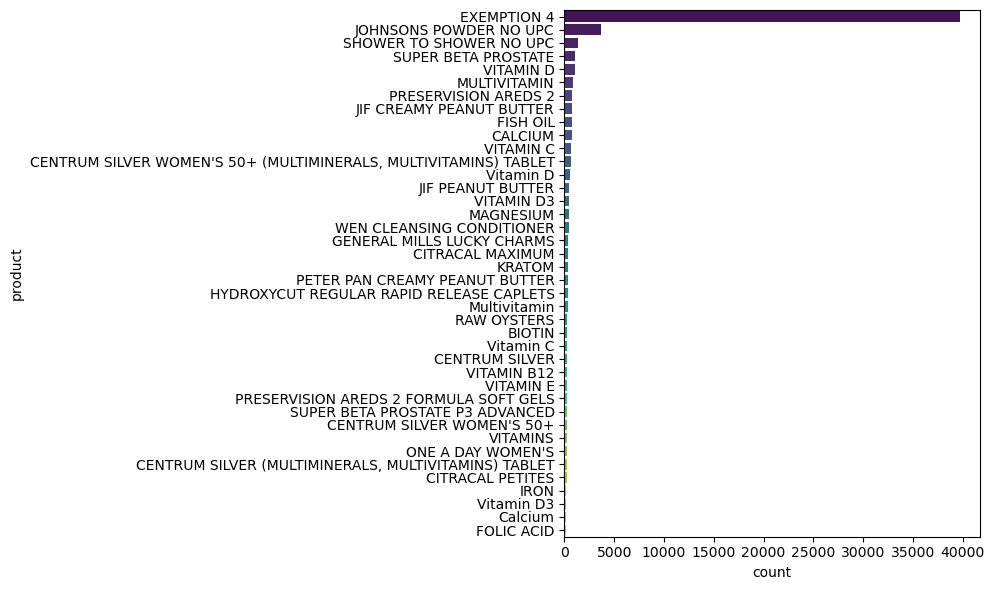

In [15]:
top_40_products = data['product'].value_counts().head(40)

filtered_data_product = data[data['product'].isin(top_40_products.index)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data_product, y='product', order=top_40_products.index,palette="viridis")

plt.tight_layout()
plt.show()


In [16]:
data['event_separated'] = data['event'].str.split(', ')

exploded_data = data.explode('event_separated')
exploded_data.head()

,report_date,id,event_onset,product_type,product,product_code,description,age,age_unit,sex,event,outcome,event_separated
0,2024-07-31,2024-CFS-010273,2024-07-31,SUSPECT,SILK UNSWEETENED VANILLA ALMOND MILK,14,Filled Milk/Imit Milk Prod,NaN,NaN,Unknown,Nausea,Other Serious or Important Medical Event,Nausea
1,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 1 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,Arrhythmia
1,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 1 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,Supraventricular tachycardia
2,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 2 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,Arrhythmia
2,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 2 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,Supraventricular tachycardia


In [17]:
exploded_data['event_separated'].value_counts().sort_values(ascending=False)

event_separated
Death                             17839
Ovarian cancer                    16925
DIARRHOEA                         15628
VOMITING                          13444
NAUSEA                            11852
                                  ...  
Cauda equina syndrome                 1
CARTILAGE DEVELOPMENT DISORDER        1
ANAL FUNGAL INFECTION                 1
EAR DEFORMITY ACQUIRED                1
CORONARY ARTERY EMBOLISM              1
Name: count, Length: 7719, dtype: int64

C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\809561102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y='event_separated', order=top_40_events.index,palette="viridis")


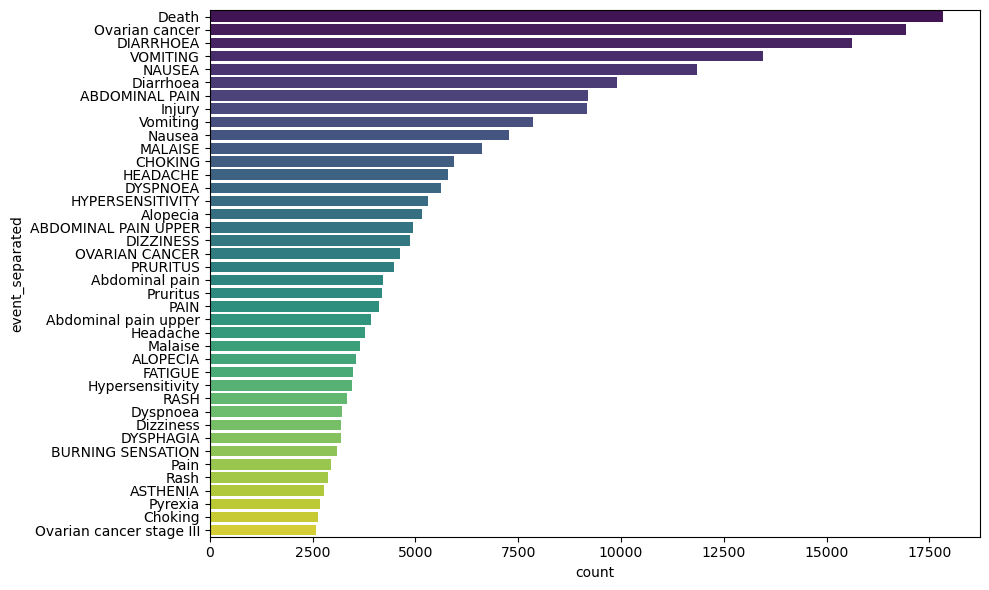

In [18]:
top_40_events = exploded_data['event_separated'].value_counts().head(40)

filtered_data = exploded_data[exploded_data['event_separated'].isin(top_40_events.index)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, y='event_separated', order=top_40_events.index,palette="viridis")

plt.tight_layout()
plt.show()


In [19]:
data.sex.unique()

array(['Unknown', 'Male', 'Female', nan, 'Not Reported',
       'Unspecified (or another gender identity)'], dtype=object)

In [20]:
data['sex'] = data['sex'].replace({np.nan: 'Unknown', 'Not Reported': 'Unknown', 'Unspecified (or another gender identity)':'Unknown'})

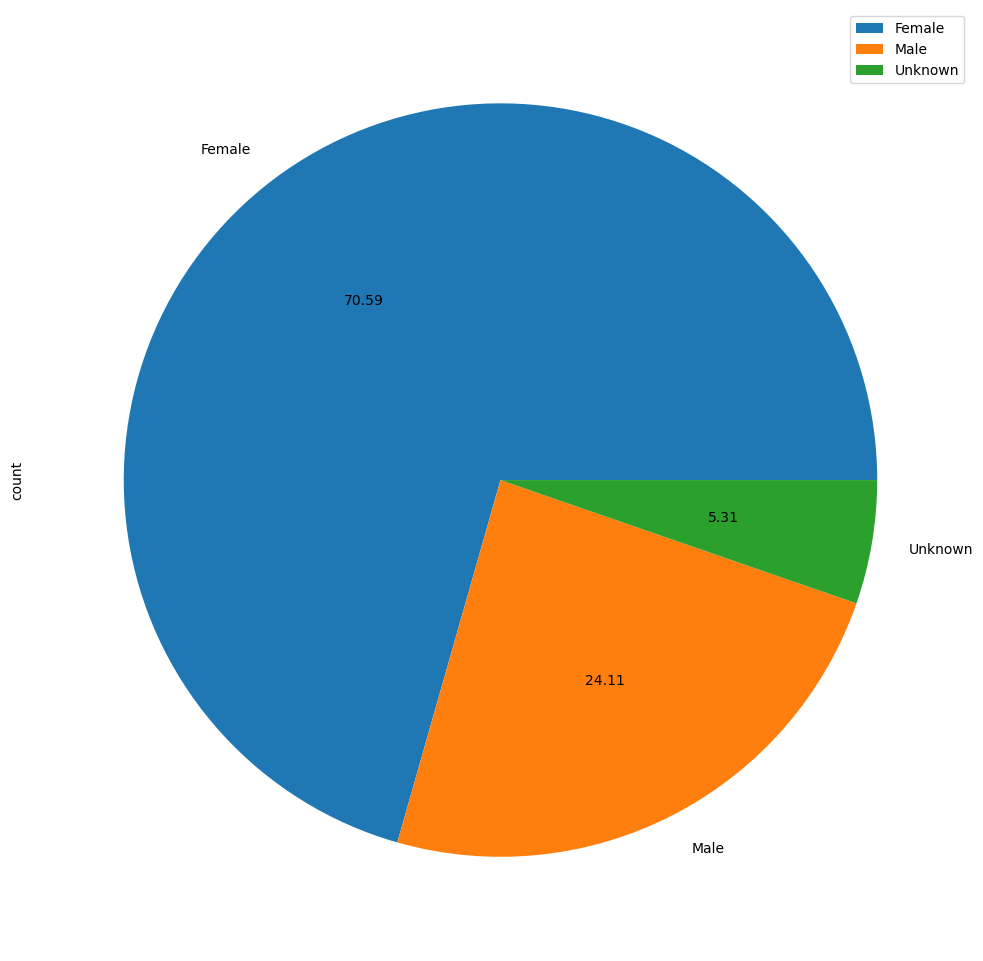

In [21]:
plt.figure(figsize=(10,10))
data['sex'].value_counts().plot.pie(autopct='%.2f', legend=True)
plt.tight_layout()

In [22]:
data['outcome_separated'] = data['outcome'].str.split(', ')

exploded_data_outcome = data.explode('outcome_separated')
exploded_data_outcome

,report_date,id,event_onset,product_type,product,product_code,description,age,age_unit,sex,event,outcome,event_separated,outcome_separated
0,2024-07-31,2024-CFS-010273,2024-07-31,SUSPECT,SILK UNSWEETENED VANILLA ALMOND MILK,14,Filled Milk/Imit Milk Prod,NaN,NaN,Unknown,Nausea,Other Serious or Important Medical Event,[Nausea],Other Serious or Important Medical Event
1,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 1 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,"[Arrhythmia, Supraventricular tachycardia]",Other Serious or Important Medical Event
2,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 2 120 CAPSULES,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,"[Arrhythmia, Supraventricular tachycardia]",Other Serious or Important Medical Event
3,2024-07-31,2024-CFS-010269,NaT,SUSPECT,CELLCORE PARA 3 2OZ,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Male,"Arrhythmia, Supraventricular tachycardia",Other Serious or Important Medical Event,"[Arrhythmia, Supraventricular tachycardia]",Other Serious or Important Medical Event
4,2024-07-31,2024-CFS-010262,2024-07-15,SUSPECT,SLOWMAG MG MUSCLE PLUS HEART,54,Vit/Min/Prot/Unconv Diet(Human/Animal),81.0,year(s),Female,"Dizziness, Loss of consciousness, Vomiting","Other Serious or Important Medical Event, Othe...","[Dizziness, Loss of consciousness, Vomiting]",Other Serious or Important Medical Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221174,1999-05-13,100919,NaT,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room","[DIZZINESS, FEELING ABNORMAL]",Hospitalization
221174,1999-05-13,100919,NaT,SUSPECT,AM-300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"DIZZINESS, FEELING ABNORMAL","Hospitalization, Visited Emergency Room","[DIZZINESS, FEELING ABNORMAL]",Visited Emergency Room
221175,1999-05-13,100918,NaT,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room","[HYPERVENTILATION, PALPITATIONS]",Hospitalization
221175,1999-05-13,100918,NaT,SUSPECT,AM 300,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,Female,"HYPERVENTILATION, PALPITATIONS","Hospitalization, Visited Emergency Room","[HYPERVENTILATION, PALPITATIONS]",Visited Emergency Room


In [23]:
exploded_data_outcome['outcome_separated'].value_counts().sort_values(ascending=False)

outcome_separated
Other Serious or Important Medical Event    105187
Hospitalization                              35043
Other Outcome                                34533
Visited a Health Care Provider               31975
Visited Emergency Room                       21937
Death                                        18306
Other Serious Outcome                        11699
Life Threatening                              9524
Disability                                    7978
Required Intervention                         3186
Allergic Reaction                              912
Congenital Anomaly                             182
Injury                                           8
Name: count, dtype: int64

C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\3964178477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


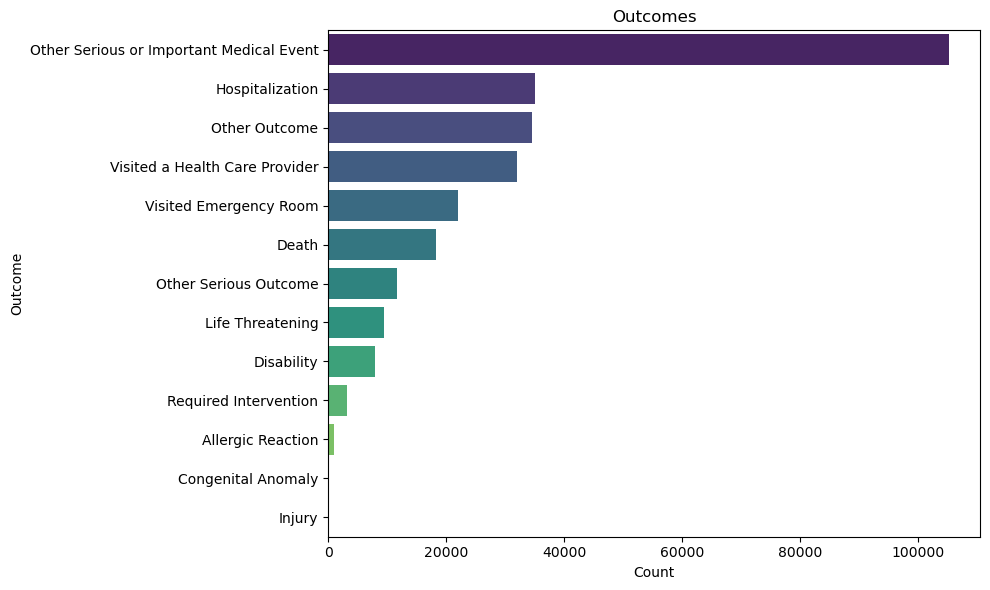

In [24]:
top_outcome = exploded_data_outcome['outcome_separated'].value_counts()


# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=exploded_data_outcome, 
    y='outcome_separated', 
    order=top_outcome.index, 
    palette="viridis"
)

plt.title('Outcomes')
plt.xlabel('Count')
plt.ylabel('Outcome')
plt.tight_layout()
plt.show()


In [25]:
death_data = exploded_data_outcome[exploded_data_outcome['outcome_separated'] == 'Death']

# Get the top products associated with deaths
product_death_counts = death_data['product'].value_counts().head(20)
product_death_counts

product
EXEMPTION 4                                                  13414
JOHNSONS POWDER NO UPC                                        1941
SHOWER TO SHOWER NO UPC                                        914
KRATOM                                                         167
PRESERVISION AREDS 2                                            48
RAW OYSTERS                                                     48
PRESERVISION AREDS 2 FORMULA SOFT GELS                          27
AXONA                                                           16
5-HOUR ENERGY                                                   14
5 HOUR ENERGY                                                   14
CENTRUM                                                         13
BENEFIBER WITH WHEAT DEXTRIN (NCH) (WHEAT DEXTRIN) POWDER       11
Kratom                                                           8
SIMPLY THICK                                                     8
EMERGEN-C                                             

C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\1139989901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


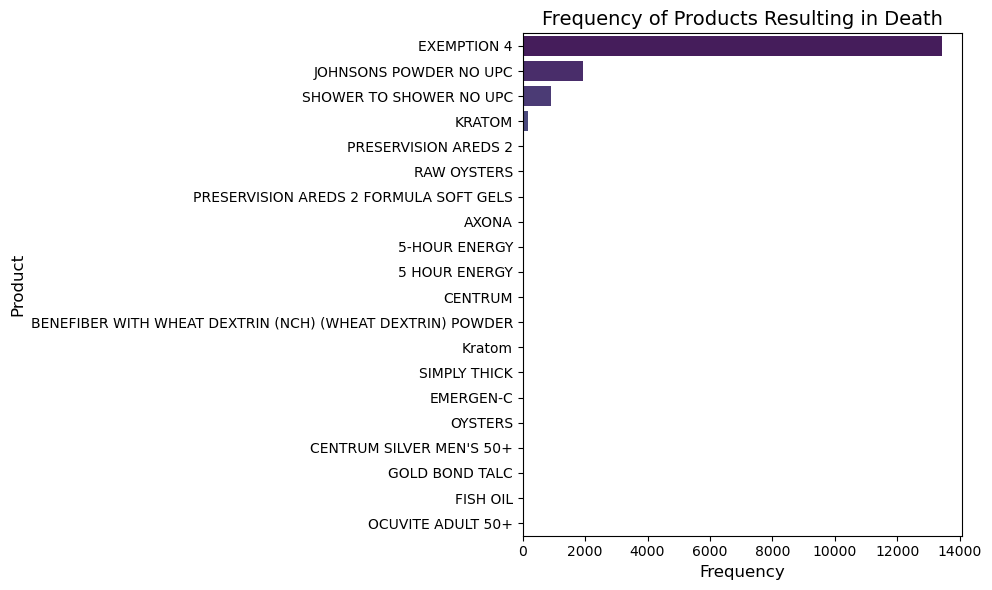

In [26]:
death_data = exploded_data_outcome[exploded_data_outcome['outcome_separated'] == 'Death']

# Get the top products associated with deaths
product_death_counts = death_data['product'].value_counts().head(20)

# Plot the frequency graph
plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_death_counts.values,
    y=product_death_counts.index,
    palette="viridis"
)

# Add titles and labels
plt.title('Frequency of Products Resulting in Death', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.show()

What are the most frequently reported products in the dataset?

In [28]:
data['product'].value_counts().sort_values(ascending=False).head(10)

product
EXEMPTION 4                 39750
JOHNSONS POWDER NO UPC       3722
SHOWER TO SHOWER NO UPC      1349
SUPER BETA PROSTATE          1108
VITAMIN D                    1025
MULTIVITAMIN                  816
PRESERVISION AREDS 2          801
JIF CREAMY PEANUT BUTTER      796
FISH OIL                      783
CALCIUM                       744
Name: count, dtype: int64

Which products are associated with the most severe outcomes?

In [30]:
exploded_data_outcome[exploded_data_outcome['outcome_separated'] == 'Death']['product'].value_counts().head(10)


product
EXEMPTION 4                               13414
JOHNSONS POWDER NO UPC                     1941
SHOWER TO SHOWER NO UPC                     914
KRATOM                                      167
PRESERVISION AREDS 2                         48
RAW OYSTERS                                  48
PRESERVISION AREDS 2 FORMULA SOFT GELS       27
AXONA                                        16
5-HOUR ENERGY                                14
5 HOUR ENERGY                                14
Name: count, dtype: int64

How many unique cases (REPORT_ID) involve multiple products?

In [32]:
product_counts = data.groupby('id')['product'].nunique()

multiple_products_count = product_counts[product_counts > 1].count()

print("Number of unique cases (REPORT_ID) with multiple products:", multiple_products_count)

Number of unique cases (REPORT_ID) with multiple products: 22105


Which cases have the highest number of adverse events listed in the CASE_MEDDRA_PREFERRED_TERMS column?

In [34]:
unique_data = data.drop_duplicates(subset='id')
unique_data['event_separated'] = unique_data['event'].str.split(', ')

exploded_unique_data = unique_data.explode('event_separated')
exploded_unique_data.head()

exploded_unique_data.groupby('id')['event_separated'].count().sort_values(ascending=False)

C:\Users\ank30\AppData\Local\Temp\ipykernel_25460\3695385670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['event_separated'] = unique_data['event'].str.split(', ')


id
180853             71
185487             54
178019             46
179504             41
84887              39
                   ..
2021-CFS-011945     1
2021-CFS-011950     1
169933              1
2021-CFS-011955     1
2020-CFS-001378     1
Name: event_separated, Length: 140565, dtype: int64

What are the most frequently reported adverse events (individual terms from CASE_MEDDRA_PREFERRED_TERMS)?

In [36]:
exploded_data['event_separated'].value_counts().sort_values(ascending=False).head(10)

event_separated
Death             17839
Ovarian cancer    16925
DIARRHOEA         15628
VOMITING          13444
NAUSEA            11852
Diarrhoea          9908
ABDOMINAL PAIN     9199
Injury             9163
Vomiting           7865
Nausea             7280
Name: count, dtype: int64

Which terms are uniquely associated with specific products?

In [38]:
term_product_count = exploded_data.groupby('event_separated')['product'].nunique()

unique_terms = term_product_count[term_product_count == 1].index

result = exploded_data[exploded_data['event_separated'].isin(unique_terms)].drop_duplicates(subset=['event_separated', 'product'])
result[['event_separated', 'product']]

,event_separated,product
120,Gastric ulcer perforation,HYALURONIC ACID
169,Neuropathic pruritus,NUTRAFOL WOMENS BALANCE HAIR GROWTH NUTRACEUTICAL
214,Bilirubinuria,DESIGNS FOR HEALTH GI MICROB-X
265,Shoulder fracture,AG1 WHOLE FOOD POUCH 360G NON SPECIFIC\t
299,Urine bilirubin increased,AG1 WHOLE FOOD POUCH 360G NON SPECIFIC\t
...,...,...
220613,Psychotic behaviour,RED #40
220822,MUCOSAL DISCOLOURATION,ENIVA MINERALS FOR LIFE-SILVER
220824,Mitral valve disease,METABOLIFE
220929,Dermatologic examination,PREMIER PIGMENTS PERMANENT TATTOO PIGMENTS: RO...


What is the distribution of the number of terms per case?

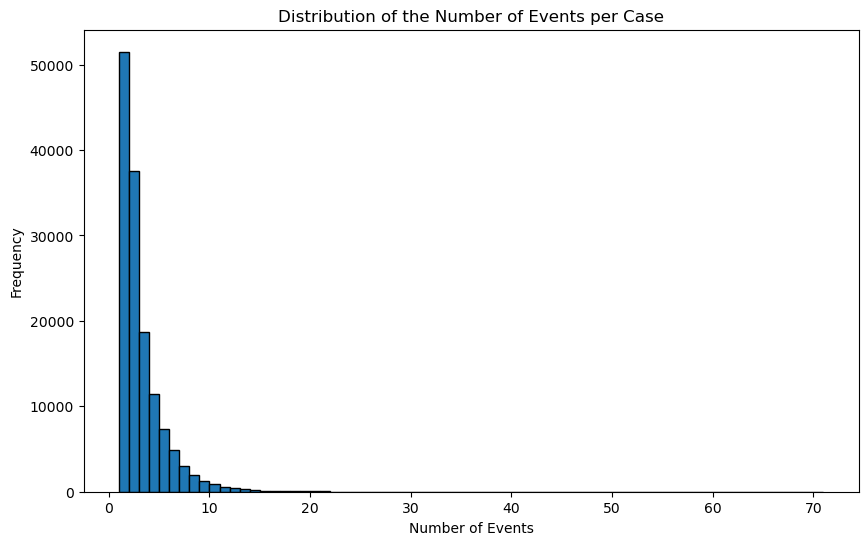

count    140565.000000
mean          2.704742
std           2.370644
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          71.000000
Name: num_events, dtype: float64


In [41]:
events_per_case = exploded_unique_data.groupby('id').size().reset_index(name='num_events')

plt.figure(figsize=(10, 6))
plt.hist(events_per_case['num_events'], bins=range(1, events_per_case['num_events'].max() + 1), edgecolor='black')
plt.title('Distribution of the Number of Events per Case')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

print(events_per_case['num_events'].describe())

How has the total number of adverse event reports changed over time?

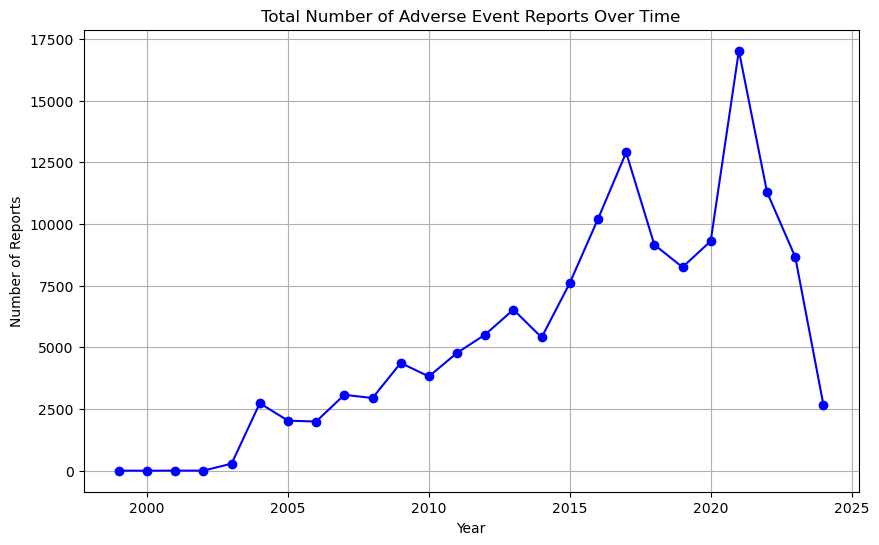

    report_date  num_reports
0          1999            5
1          2000            1
2          2001            5
3          2002            4
4          2003          288
5          2004         2736
6          2005         2029
7          2006         1995
8          2007         3077
9          2008         2947
10         2009         4368
11         2010         3820
12         2011         4778
13         2012         5519
14         2013         6530
15         2014         5402
16         2015         7607
17         2016        10203
18         2017        12898
19         2018         9160
20         2019         8249
21         2020         9305
22         2021        17021
23         2022        11288
24         2023         8660
25         2024         2670


In [43]:
reports_by_year = unique_data.groupby(unique_data['report_date'].dt.year).size().reset_index(name='num_reports')

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(reports_by_year['report_date'], reports_by_year['num_reports'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Adverse Event Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()

# Optional: Print some basic statistics to understand the trend better
print(reports_by_year)

Are there seasonal patterns in the reporting of adverse events (e.g., spikes in certain months)?

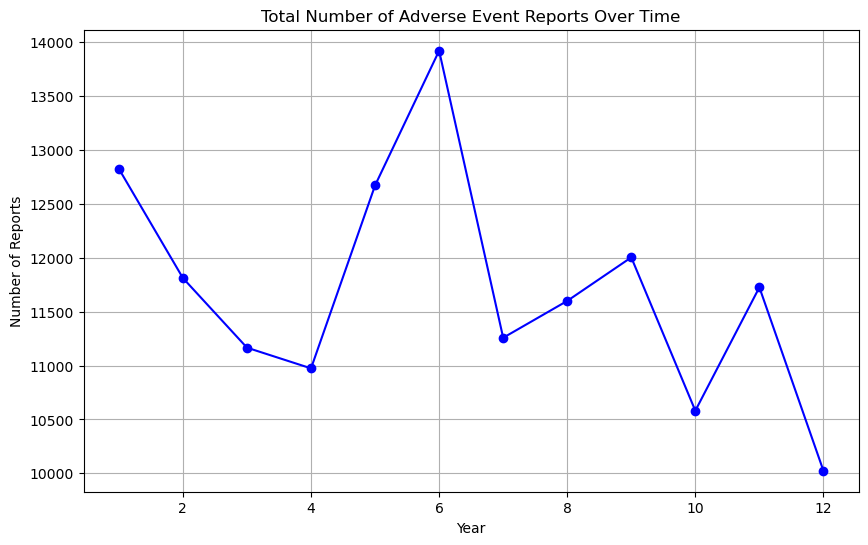

    report_date  num_reports
0             1        12826
1             2        11812
2             3        11166
3             4        10974
4             5        12672
5             6        13922
6             7        11258
7             8        11600
8             9        12004
9            10        10581
10           11        11726
11           12        10024


In [45]:
reports_by_year = unique_data.groupby(unique_data['report_date'].dt.month).size().reset_index(name='num_reports')

plt.figure(figsize=(10, 6))
plt.plot(reports_by_year['report_date'], reports_by_year['num_reports'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Adverse Event Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()

print(reports_by_year)